In [250]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import plotly.express as px


In [251]:
loan = pd.read_csv('kiva_loans.csv')

In [252]:
loan.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


In [253]:
loan.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [254]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [255]:
loan.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [256]:
loan.isna().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [257]:
loan.value_counts('region')

region
Kaduna                             10000
Lahore                              7178
Rawalpindi                          4496
Cusco                               3841
Dar es Salaam                       3719
                                   ...  
PALSADA, NUAPADA, ODISHA               1
San Ramon, Mallig, Isabela             1
San Ramón                              1
Ha Penya Berea                         1
Llano Silleta, San Luis Acatlán        1
Name: count, Length: 12695, dtype: int64

In [258]:
loan.shape

(671205, 20)

In [259]:
loan['posted_time'] = pd.to_datetime(loan['posted_time']).dt.date
loan['posted_time'] = pd.to_datetime(loan['posted_time'])

loan['disbursed_time'] = pd.to_datetime(loan['disbursed_time']).dt.date
loan['disbursed_time'] = pd.to_datetime(loan['disbursed_time'])

loan['funded_time'] = pd.to_datetime(loan['funded_time']).dt.date
loan['funded_time'] = pd.to_datetime(loan['funded_time'])


In [260]:
loan['partner_id'] = loan['partner_id'].round(0).astype("Int64")
loan['term_in_months'] = loan['term_in_months'].round(0).astype("Int64")

In [261]:
loan.dtypes

id                             int64
funded_amount                float64
loan_amount                  float64
activity                      object
sector                        object
use                           object
country_code                  object
country                       object
region                        object
currency                      object
partner_id                     Int64
posted_time           datetime64[ns]
disbursed_time        datetime64[ns]
funded_time           datetime64[ns]
term_in_months                 Int64
lender_count                   int64
tags                          object
borrower_genders              object
repayment_interval            object
date                          object
dtype: object

In [262]:
loan.drop('tags', axis=1, inplace=True)
loan.drop('use', axis=1, inplace=True)

In [263]:
loan['funding_in_%'] = ((loan['funded_amount'] / loan['loan_amount']) * 100).round(2)

In [264]:
loan['funding_in_%'].sample(10)

109463    100.0
639352    100.0
445739    100.0
308009    100.0
314474    100.0
296053    100.0
238646    100.0
176315     30.0
479562    100.0
448745    100.0
Name: funding_in_%, dtype: float64

In [265]:
loan['borrower_genders'].fillna('Not Mentioned', inplace=True)

In [266]:
loan.isna().sum()

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
country_code              8
country                   0
region                56800
currency                  0
partner_id            13507
posted_time               0
disbursed_time         2396
funded_time           48331
term_in_months            0
lender_count              0
borrower_genders          0
repayment_interval        0
date                      0
funding_in_%              0
dtype: int64

In [267]:
loan.dropna(inplace=True)

In [268]:
loan.shape

(574119, 19)

In [269]:
loan['date'].head()

0    2014-01-01
1    2014-01-01
2    2014-01-01
3    2014-01-01
4    2014-01-01
Name: date, dtype: object

In [270]:
loan[['currency','loan_amount', 'funded_amount']].sample(10)

,currency,loan_amount,funded_amount
98310,NGN,150.0,150.0
545906,KES,650.0,650.0
90597,NGN,50.0,50.0
386068,PHP,400.0,400.0
544433,PKR,350.0,350.0
556551,PHP,150.0,150.0
495963,MZN,650.0,650.0
379405,USD,800.0,800.0
469792,PHP,175.0,175.0
117247,USD,2000.0,2000.0


# Loan by year

In [271]:
loan_by_country = loan.groupby('country').agg(
    number_of_loan = ("country", "count"),
    total_funded =("funded_amount", "sum"), 
    total_loan = ("loan_amount", "sum")
)

In [272]:
sum_loan_by_country = loan_by_country.sort_values(by='total_loan', ascending=False).reset_index(drop=False)

In [273]:
loan_by_country.select_dtypes(include=['number', 'float64', 'int64']).corr()

,number_of_loan,total_funded,total_loan
number_of_loan,1.000000,0.850921,0.850921
total_funded,0.850921,1.000000,1.000000
total_loan,0.850921,1.000000,1.000000


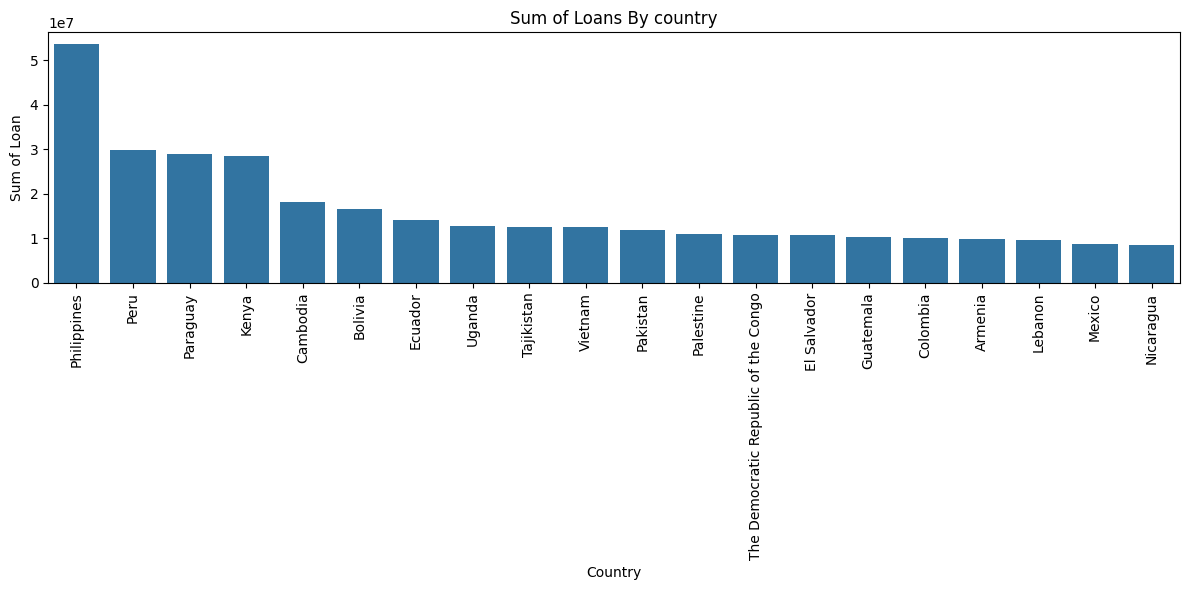

In [274]:
plt.figure(figsize=(12, 6))
sns.barplot(sum_loan_by_country.head(20), x ='country', y='total_loan')
plt.xlabel('Country')
plt.ylabel('Sum of Loan')
plt.title('Sum of Loans By country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

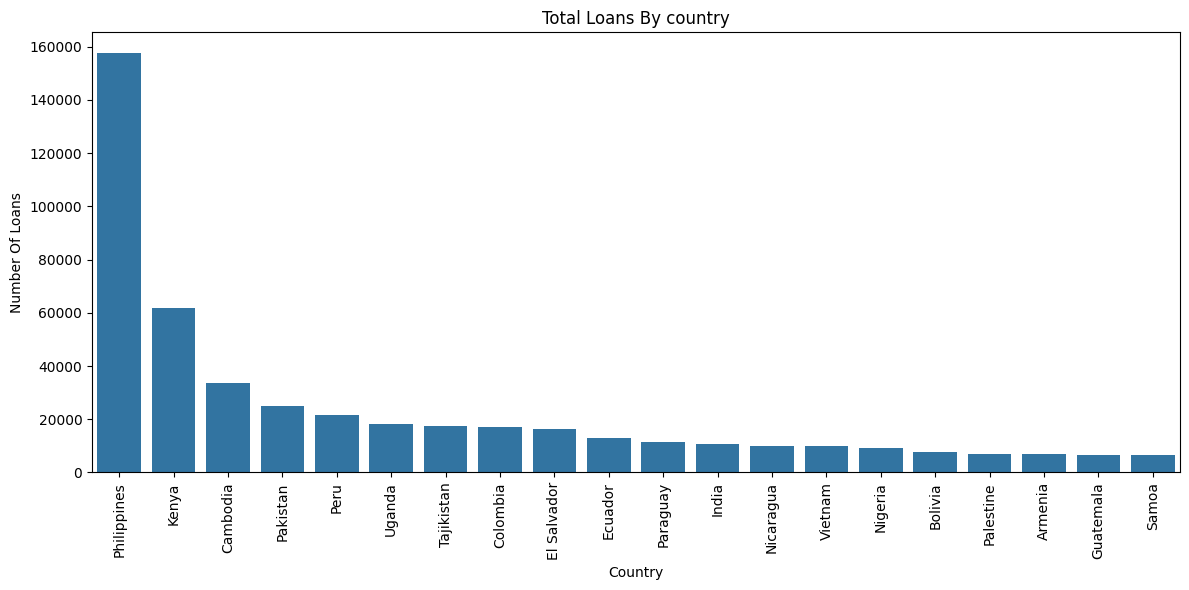

In [275]:
num_of_loan_by_country = loan_by_country.sort_values(by='number_of_loan', ascending=False).reset_index(drop=False)

plt.figure(figsize=(12, 6))
sns.barplot(num_of_loan_by_country.head(20), x ='country', y='number_of_loan')
plt.xlabel('Country')
plt.ylabel('Number Of Loans')
plt.title('Total Loans By country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

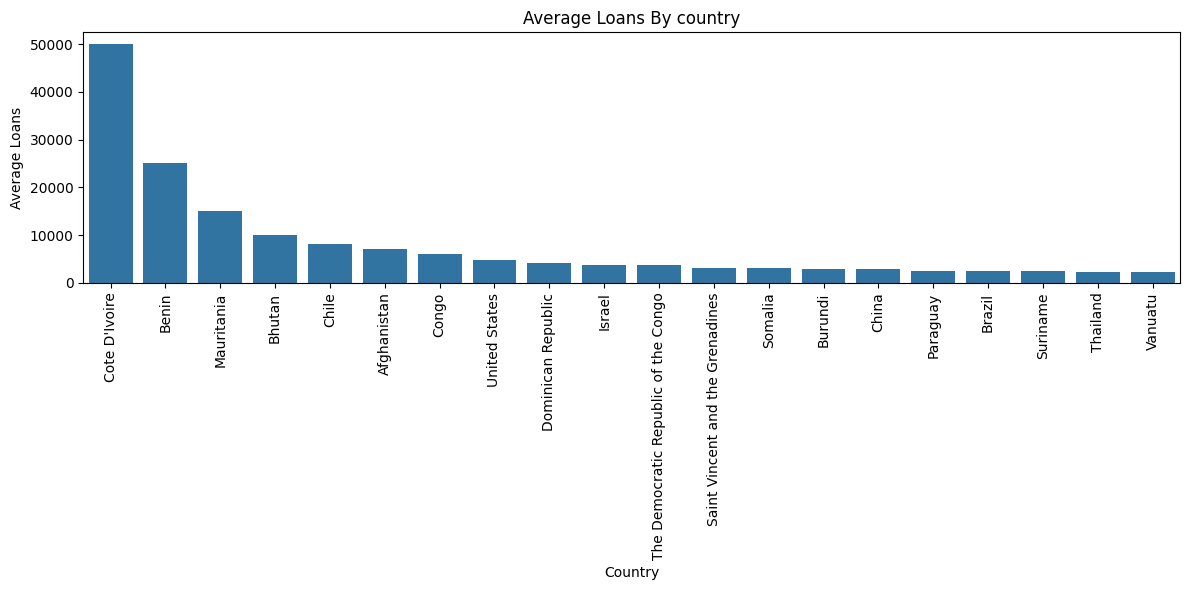

In [276]:
loan_by_country['average_loan_by_country']= loan_by_country['total_loan']/ loan_by_country['number_of_loan']
loan_by_country_average=loan_by_country.sort_values(by='average_loan_by_country', ascending=False).reset_index(drop=False)

plt.figure(figsize=(12, 6))
sns.barplot(loan_by_country_average.head(20), x ='country', y='average_loan_by_country')
plt.xlabel('Country')
plt.ylabel('Average Loans')
plt.title('Average Loans By country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Average Loan Processing Time

In [277]:
loan['posted_funded_interval'] = (loan['funded_time'] - loan['posted_time']).dt.days
kiva_loans_filtered = loan[loan['posted_funded_interval'] > 0]
summary = kiva_loans_filtered.describe(percentiles=[0.5])
mean_interval = summary['posted_funded_interval']['mean']
print("Mean interval (in days):", mean_interval)

Mean interval (in days): 13.85981288391198


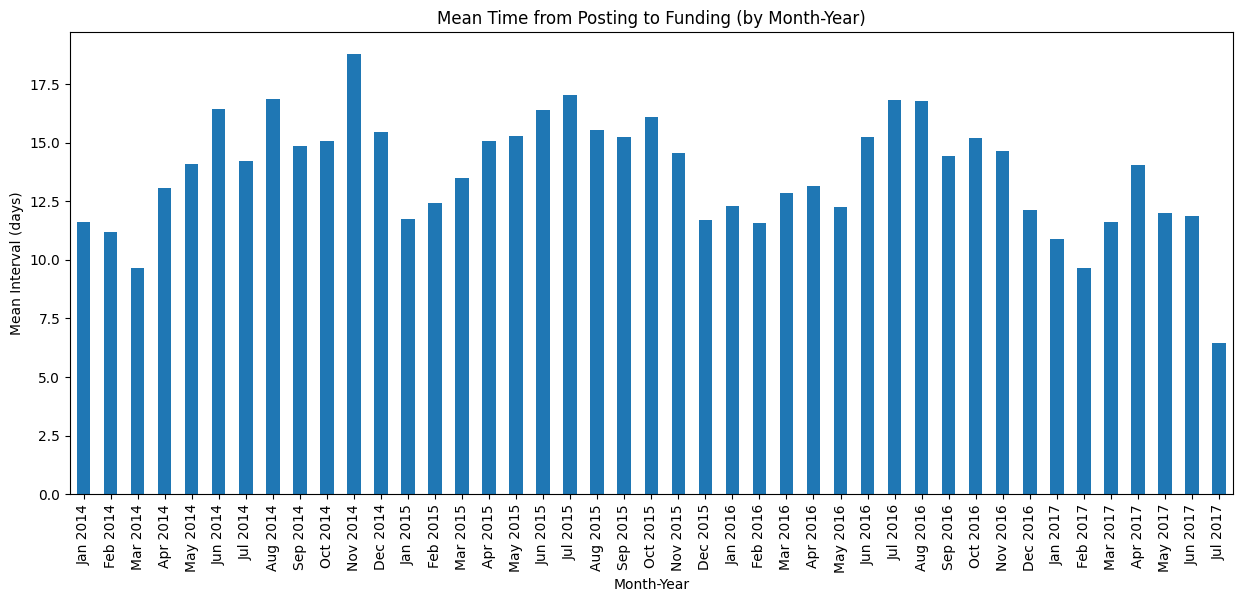

In [278]:
loan['posted_funded_interval'] = (loan['funded_time'] - loan['posted_time']).dt.days
kiva_loans_filteredmom = loan[loan['posted_funded_interval'] > 0]

monthly_means = kiva_loans_filteredmom.groupby(loan['posted_time'].dt.to_period('M'))['posted_funded_interval'].mean()
monthly_means.index = monthly_means.index.strftime('%b %Y')

plt.figure(figsize=(15, 6))
monthly_means.plot(kind='bar')
plt.xlabel('Month-Year')
plt.ylabel('Mean Interval (days)')
plt.title('Mean Time from Posting to Funding (by Month-Year)')
plt.show()

In [279]:
loan['daily_processing_time'] = (loan['funded_time'] - loan['posted_time']).dt.days
print('Average number of days to process a loan: ', loan['daily_processing_time'].mean())

Average number of days to process a loan:  13.52348032376563


# Number of Loans Growth Rate

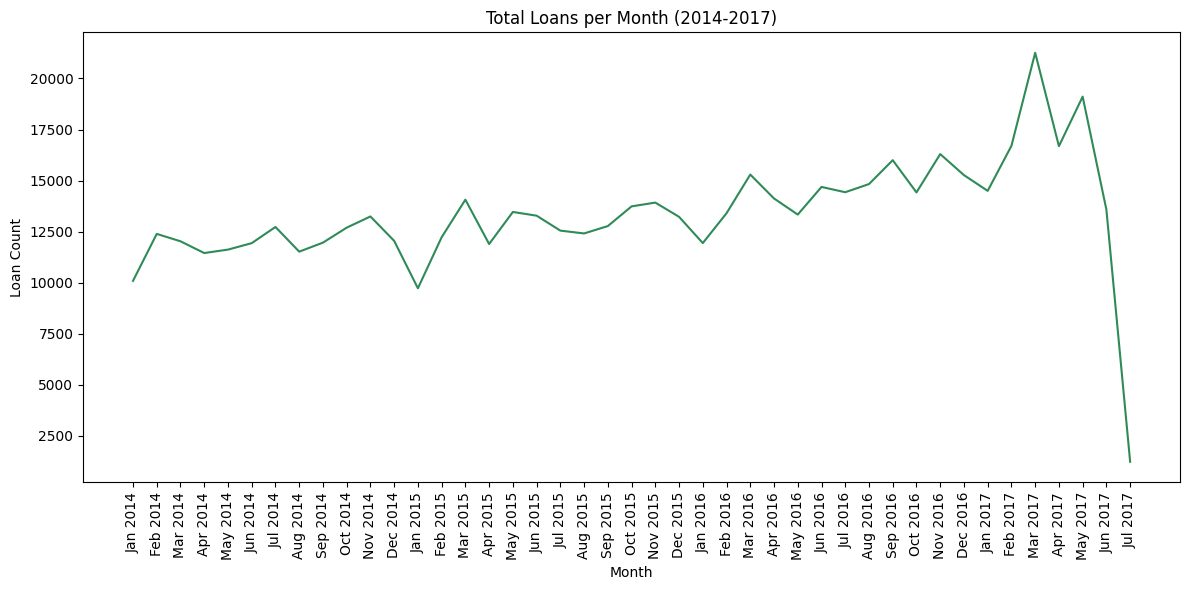

In [280]:
monthly_loan_amount = loan.groupby(loan['posted_time'].dt.to_period('M'))['id'].count()
monthly_loan_amount.index = monthly_loan_amount.index.strftime('%b %Y')

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_loan_amount.index, y=monthly_loan_amount, color='#2E8B57')
plt.xlabel('Month')
plt.ylabel('Loan Count')
plt.title('Total Loans per Month (2014-2017)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [281]:
threshold = len(loan) * 0.08
print(threshold)

45929.520000000004


In [282]:
loan['country'].value_counts().head(10). reset_index()

,country,count
0,Philippines,157532
1,Kenya,61839
2,Cambodia,33439
3,Pakistan,24917
4,Peru,21473
5,Uganda,18093
6,Tajikistan,17443
7,Colombia,17262
8,El Salvador,16505
9,Ecuador,12867


In [283]:
loan_theme = pd.read_csv('loan_theme_ids.csv')

In [284]:
loan_theme.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [285]:
locations = pd.read_csv('kiva_mpi_region_locations.csv')

In [286]:
locations.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [287]:
themes_by_region = pd.read_csv('loan_themes_by_region.csv')

In [288]:
themes_by_region.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [289]:
themes_by_region.columns

Index(['Partner ID', 'Field Partner Name', 'sector', 'Loan Theme ID',
       'Loan Theme Type', 'country', 'forkiva', 'region', 'geocode_old', 'ISO',
       'number', 'amount', 'LocationName', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')

# Kiva Loan Processing Time

 The average loan processing time was caculated in number of days using the function below. This can also be equated to disbursement delay.

In [308]:
def calculate_average_loan_processing_time(loans):
     """This function calculates the average loan processing time in days.

  Args:
      loans (pandas.DataFrame): The loan data containing columns like 'funded_time' and 'disbursed_time'.

  Returns:
      float: The average loan disbursement time in days. """

     loan['disbursement_delay'] = loan['disbursed_time'] - loan['funded_time']

    # Convert time difference to days
     loan['disbursement_delay_days'] = loan['disbursement_delay'].dt.days

    # Calculate and return the average disbursement delay in days
     return loan['disbursement_delay_days'].mean()

average_loan_processing_time = calculate_average_loan_processing_time(loan)
print("Average Loan processing Time :", average_loan_processing_time, "days")

Average Loan processing Time : -28.537244020838884 days


The disbursement delay was also caculated for each loan and grouped by the country.

In [299]:
loan[['country', 'funded_time', 'disbursed_time', 'disbursement_delay_days']].head(10)

,country,funded_time,disbursed_time,disbursement_delay_days
0,Pakistan,2014-01-02,2013-12-17,-16
1,Pakistan,2014-01-02,2013-12-17,-16
2,India,2014-01-01,2013-12-17,-15
3,Pakistan,2014-01-01,2013-12-24,-8
4,Pakistan,2014-01-01,2013-12-17,-15
6,India,2014-01-01,2013-12-16,-16
7,Pakistan,2014-01-10,2013-12-20,-21
8,Pakistan,2014-01-01,2013-12-20,-12
9,Pakistan,2014-01-03,2013-12-17,-17
10,Pakistan,2014-01-01,2013-12-24,-8


The data was sorted in a descending order and a list  of top 20 countries in loan disbursement delays was obtained

In [304]:
disbursment_delay_by_country = loan.groupby('country').agg(
    average_disbursement_delay = ("disbursement_delay_days", "mean")
)

disbursment_delay_by_country_20 = disbursment_delay_by_country.sort_values(by='average_disbursement_delay', ascending=False).head(20)
disbursment_delay_by_country_20

,average_disbursement_delay
country,
Somalia,59.880000
Bhutan,56.000000
South Africa,49.917553
Afghanistan,45.000000
Mauritania,42.000000
Belize,39.065041
Saint Vincent and the Grenadines,25.500000
Thailand,23.189944
Zambia,3.992764


A bar graph was drawn for easy visualization of the data.

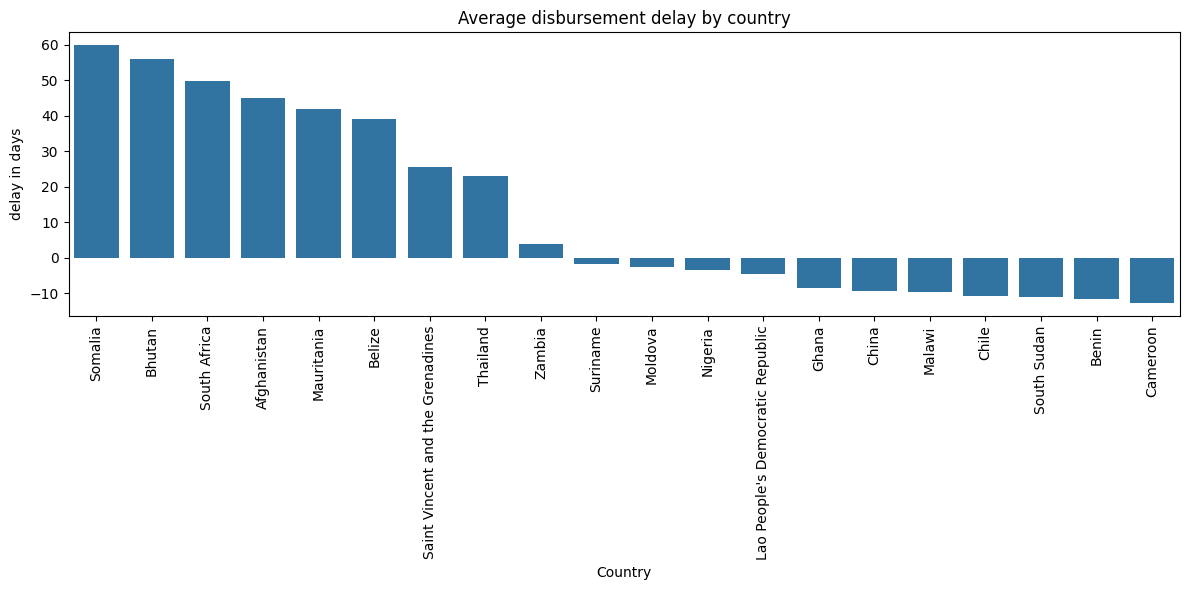

In [307]:
plt.figure(figsize=(12, 6))
sns.barplot(disbursment_delay_by_country_20, x ='country', y='average_disbursement_delay')
plt.xlabel('Country')
plt.ylabel('delay in days')
plt.title('Average disbursement delay by country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()